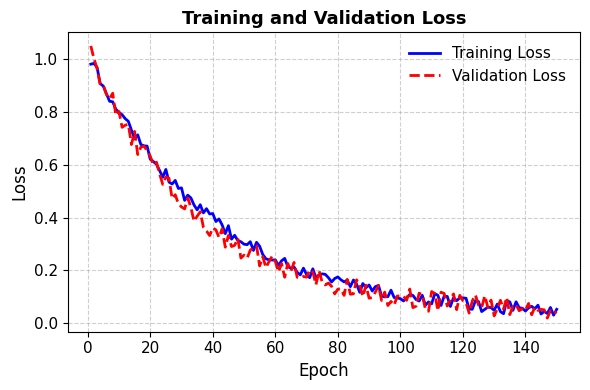

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# ===== 模拟数据（可换成你实际的 loss 数据） =====
epochs = np.arange(1, 151)  # 150 epochs
train_loss = np.exp(-epochs / 40) + 0.05 * np.random.rand(len(epochs))
val_loss   = np.exp(-epochs / 35) + 0.08 * np.random.rand(len(epochs))

# ===== 绘图风格 =====
plt.figure(figsize=(6,4))  # 宽6英寸，高4英寸
plt.plot(epochs, train_loss, label="Training Loss", color="blue", linewidth=2)
plt.plot(epochs, val_loss, label="Validation Loss", color="red", linewidth=2, linestyle="--")

# ===== 图形修饰（符合学术规范） =====
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss", fontsize=13, weight="bold")
plt.legend(fontsize=11, loc="upper right", frameon=False)
plt.grid(True, linestyle="--", alpha=0.6)

# 设置坐标轴刻度字号
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# ===== 导出为矢量图（论文推荐格式） =====
plt.tight_layout()
plt.savefig("loss_curve.pdf", format="pdf", dpi=300)  # 矢量 PDF
plt.savefig("loss_curve.png", format="png", dpi=300)  # 高分辨率 PNG

plt.show()

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   36.6171         2.48066         3.90821         1.20930   
1      2   67.8521         2.05206         1.97266         1.04402   
2      3   98.2511         2.00233         1.51880         1.03905   
3      4  128.8970         1.98177         1.36524         1.02578   
4      5  159.4100         1.91365         1.29421         1.00800   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.59429            0.63523           0.59015   
1               0.68808            0.67753           0.67308   
2               0.76438            0.69556           0.70776   
3               0.80811            0.71262           0.72086   
4               0.84713            0.67545           0.74867   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.21985       2.02510       1.82620       1.03819  0.000663   
1              0.25530       1.97129  

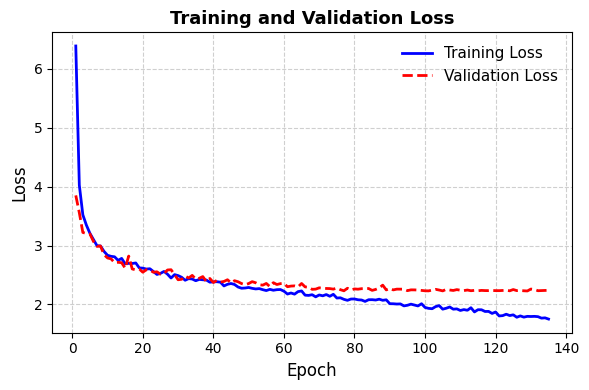

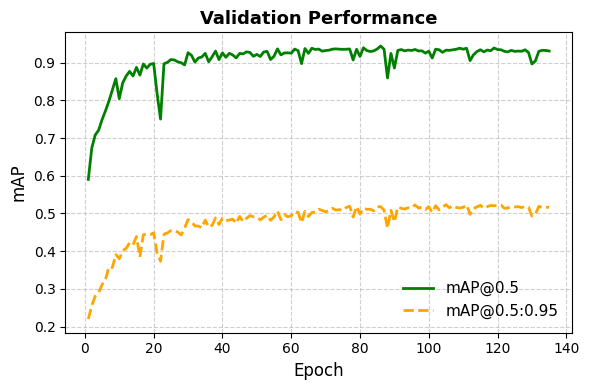

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. 读取 YOLO results.csv ===
log_path = "runs/detect/hexbug_yolov8n5/results.csv"  # 修改为你的实际路径
df = pd.read_csv(log_path)

# df.columns 通常包含：epoch, train/val losses, metrics (P, R, mAP50, mAP50-95)
print(df.head())

# === 2. 提取数据 ===
epochs = df["epoch"]
train_loss = df["train/box_loss"] + df["train/cls_loss"]  # 也可以分开画
val_loss   = df["val/box_loss"]   + df["val/cls_loss"]

map50      = df["metrics/mAP50(B)"]
map5095    = df["metrics/mAP50-95(B)"]

# === 3. 绘制损失曲线 ===
plt.figure(figsize=(6,4))
plt.plot(epochs, train_loss, label="Training Loss", color="blue", linewidth=2)
plt.plot(epochs, val_loss, label="Validation Loss", color="red", linestyle="--", linewidth=2)

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss", fontsize=13, weight="bold")
plt.legend(fontsize=11, loc="upper right", frameon=False)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("loss_curve.pdf", dpi=300)
plt.show()

# === 4. 绘制 mAP 曲线 ===
plt.figure(figsize=(6,4))
plt.plot(epochs, map50, label="mAP@0.5", color="green", linewidth=2)
plt.plot(epochs, map5095, label="mAP@0.5:0.95", color="orange", linestyle="--", linewidth=2)

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("mAP", fontsize=12)
plt.title("Validation Performance", fontsize=13, weight="bold")
plt.legend(fontsize=11, loc="lower right", frameon=False)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("map_curve.pdf", dpi=300)
plt.show()

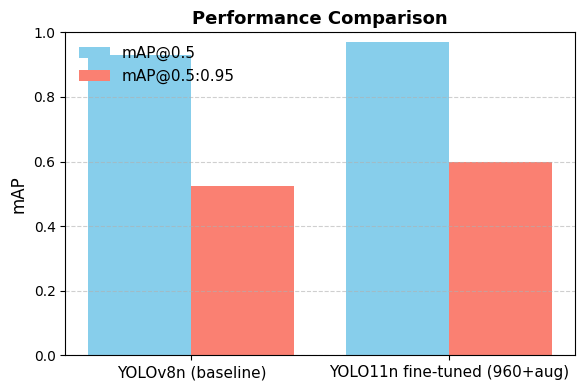

In [3]:
import matplotlib.pyplot as plt

# === 两次训练的最终结果 ===
models = ["YOLOv8n (baseline)", "YOLO11n fine-tuned (960+aug)"]
map50 = [0.929, 0.969]
map5095 = [0.525, 0.599]

# === 绘制对比柱状图 ===
x = range(len(models))
plt.figure(figsize=(6,4))
plt.bar(x, map50, width=0.4, label="mAP@0.5", color="skyblue")
plt.bar([i+0.4 for i in x], map5095, width=0.4, label="mAP@0.5:0.95", color="salmon")

# === 美化 ===
plt.xticks([i+0.2 for i in x], models, fontsize=11)
plt.ylabel("mAP", fontsize=12)
plt.ylim(0,1.0)
plt.title("Performance Comparison", fontsize=13, weight="bold")
plt.legend(fontsize=11, loc="upper left", frameon=False)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.savefig("yolo_comparison.pdf", dpi=300)
plt.show()


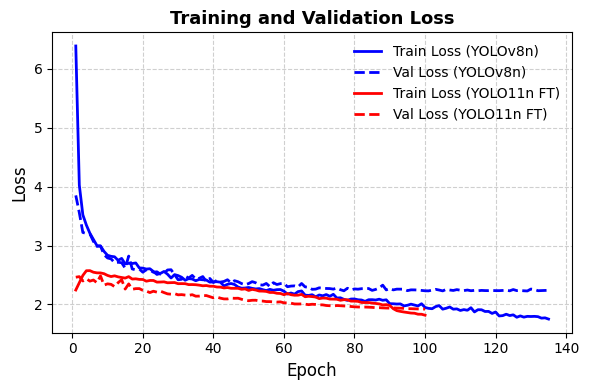

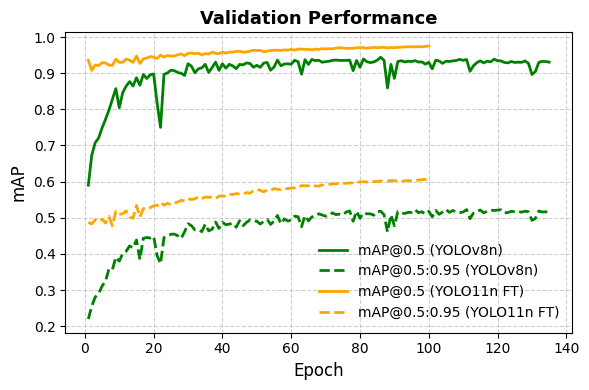

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. 读取两次训练日志 ===
log1 = "runs/detect/hexbug_yolov8n5/results.csv"   # baseline
log2 = "runs/detect/hexbug_yolo11n_finetune_960aug/results.csv"  # fine-tuned

df1 = pd.read_csv(log1)
df2 = pd.read_csv(log2)

# === 2. 提取数据 ===
epochs1 = df1["epoch"]
epochs2 = df2["epoch"]

train_loss1 = df1["train/box_loss"] + df1["train/cls_loss"]
val_loss1   = df1["val/box_loss"] + df1["val/cls_loss"]

train_loss2 = df2["train/box_loss"] + df2["train/cls_loss"]
val_loss2   = df2["val/box_loss"] + df2["val/cls_loss"]

map50_1   = df1["metrics/mAP50(B)"]
map5095_1 = df1["metrics/mAP50-95(B)"]

map50_2   = df2["metrics/mAP50(B)"]
map5095_2 = df2["metrics/mAP50-95(B)"]

# === 3. 图 1：训练/验证损失曲线 ===
plt.figure(figsize=(6,4))

plt.plot(epochs1, train_loss1, label="Train Loss (YOLOv8n)", color="blue", linewidth=2)
plt.plot(epochs1, val_loss1,   label="Val Loss (YOLOv8n)",   color="blue", linestyle="--", linewidth=2)

plt.plot(epochs2, train_loss2, label="Train Loss (YOLO11n FT)", color="red", linewidth=2)
plt.plot(epochs2, val_loss2,   label="Val Loss (YOLO11n FT)",   color="red", linestyle="--", linewidth=2)

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss", fontsize=13, weight="bold")
plt.legend(fontsize=10, loc="upper right", frameon=False)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("loss_curve_comparison.pdf", dpi=300)  # 矢量 PDF
plt.show()

# === 4. 图 2：mAP 曲线 ===
plt.figure(figsize=(6,4))

plt.plot(epochs1, map50_1,   label="mAP@0.5 (YOLOv8n)", color="green", linewidth=2)
plt.plot(epochs1, map5095_1, label="mAP@0.5:0.95 (YOLOv8n)", color="green", linestyle="--", linewidth=2)

plt.plot(epochs2, map50_2,   label="mAP@0.5 (YOLO11n FT)", color="orange", linewidth=2)
plt.plot(epochs2, map5095_2, label="mAP@0.5:0.95 (YOLO11n FT)", color="orange", linestyle="--", linewidth=2)

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("mAP", fontsize=12)
plt.title("Validation Performance", fontsize=13, weight="bold")
plt.legend(fontsize=10, loc="lower right", frameon=False)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("map_curve_comparison.pdf", dpi=300)  # 矢量 PDF
plt.show()
